In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from passivbot import *
from vwap import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['figure.figsize'] = [21, 13]
pd.set_option('precision', 10)

In [4]:
user = 'YOUR_USER_NAME_HERE'
commons, vwap, streamer = prepare_bot('binance', user)
vwap.stop_updater()


25 / 25 calculating ema for ZEC/BTC ...   
2020-06-05T11:01:12  margin updating balance 
2020-06-05T11:01:13  margin updating my trades ADA/BTC 
2020-06-05T11:01:13  margin updating my trades ATOM/BTC 
2020-06-05T11:01:13  margin updating my trades BAT/BTC 
2020-06-05T11:01:13  margin updating my trades BCH/BTC 
2020-06-05T11:01:13  margin updating my trades BNB/BTC 
2020-06-05T11:01:13  margin updating my trades DASH/BTC 
2020-06-05T11:01:13  margin updating my trades EOS/BTC 
2020-06-05T11:01:13  margin updating my trades ETC/BTC 
2020-06-05T11:01:14  margin updating my trades ETH/BTC 
2020-06-05T11:01:14  margin updating my trades IOST/BTC 
2020-06-05T11:01:14  margin updating my trades IOTA/BTC 
2020-06-05T11:01:14  margin updating my trades LINK/BTC 
2020-06-05T11:01:14  margin updating my trades LTC/BTC 
2020-06-05T11:01:14  margin updating my trades MATIC/BTC 
2020-06-05T11:01:14  margin updating my trades NEO/BTC 
2020-06-05T11:01:14  margin updating my trades ONT/BTC 
2020-06

In [8]:
vwap.update_balance()
equities = {}
borrowed = {}
oh = {}
for c in vwap.balance:
    equities[c] = vwap.balance[c]['equity'] / vwap.balance[c]['account_equity']
    borrowed[c] = vwap.balance[c]['borrowed'] / vwap.balance[c]['account_debt']
    oh[c] = vwap.balance[c]['onhand'] / vwap.balance[c]['account_equity']
print('\n\n(coin equity) divided by (account equity in terms of coin)\n')
for e in sorted(equities.items(), key=lambda x: x[1]):
    print(e)


2020-06-05T11:03:21  margin updating balance 


(coin equity) divided by (account equity in terms of coin)
('IOTA', -0.3101362093960746)
('ETH', -0.15775901597658812)
('XTZ', -0.15191586263693865)
('VET', -0.055458571578977565)
('NEO', -0.049823084608577956)
('XLM', -0.043292295812972184)
('BCH', -0.03624546884872952)
('ADA', -0.0341777861297571)
('IOST', -0.02256394569008644)
('EOS', -0.015442096370393779)
('MATIC', -0.011615201668177252)
('QTUM', -0.006230460761694942)
('TRX', -0.004138877648942084)
('LTC', -0.002891021452899345)
('DASH', -0.0023953927157231293)
('BAT', -0.002316923171393736)
('XRP', -0.0020691660778081934)
('LINK', -0.0002714386434034358)
('ZEC', 1.1837684269485956e-05)
('XMR', 3.2003907593498455e-05)
('ATOM', 0.0005658137118050529)
('RVN', 0.00519313938457279)
('ETC', 0.006673005060608163)
('ONT', 0.13341131987200314)
('BNB', 0.23790076320459452)
('BTC', 1.5227773122097976)


In [7]:
vwap.balance['BTC']

{'free': 0.00105481,
 'used': 0.4593118,
 'borrowed': 0.19638087,
 'interest': 0.0,
 'equity': 0.26398574,
 'borrowable': 0.0,
 'onhand': 0.46036661,
 'debt': 0.19638087,
 'account_onhand': 0.5692293896451627,
 'account_debt': 0.3797110342067422,
 'account_equity': 0.1895183554384205}

In [8]:
'''
tickers = vwap.cc.fetch_tickers()
for sym in vwap.symbols:
    vwap.cm.last_price[sym] = tickers[sym]['last']
    vwap.cm.min_ema[sym] = tickers[sym]['last']   
    vwap.cm.max_ema[sym] = tickers[sym]['last']   
'''

In [12]:
print('n days trade history in memory\n')
for s in vwap.symbols:
    print(f"{s:13} {(vwap.my_trades[s][-1]['timestamp'] - vwap.my_trades[s][0]['timestamp']) / 1000 / 60 / 60 / 24:.2f}")


n days trade history in memory

ADA/BTC       13.93
ATOM/BTC      9.48
BAT/BTC       9.74
BCH/BTC       7.55
BNB/BTC       13.65
DASH/BTC      10.39
EOS/BTC       7.80
ETC/BTC       8.06
ETH/BTC       13.82
IOST/BTC      13.18
IOTA/BTC      13.79
LINK/BTC      10.80
LTC/BTC       7.01
MATIC/BTC     7.07
NEO/BTC       13.97
ONT/BTC       8.41
QTUM/BTC      13.83
RVN/BTC       7.21
TRX/BTC       9.60
VET/BTC       13.08
XLM/BTC       13.94
XMR/BTC       7.72
XRP/BTC       8.43
XTZ/BTC       8.96
ZEC/BTC       7.42


In [13]:
s = 'LINK/BTC'
c, q = s.split('/')

In [14]:
vwap.update_balance()
#vwap.init_my_trades(s)
vwap.update_my_trades(s)
vwap.init_loan_history(c, 'borrow')
vwap.init_loan_history(c, 'repay')

2020-06-05T11:06:47  margin updating balance 
2020-06-05T11:06:48  margin updating my trades LINK/BTC 


In [16]:
vwap.update_open_orders(s)
print(f'\ncurrent open orders for {s}\n')
for my_orders in [vwap.my_bids[s], vwap.my_asks[s]]:
    for o in my_orders:
        print({k: o[k] for k in ['symbol', 'side', 'amount', 'price']})


2020-06-05T11:07:12  margin updating open orders LINK/BTC 

current open orders for LINK/BTC

{'symbol': 'LINK/BTC', 'side': 'buy', 'amount': 36.0, 'price': 0.00044899}


In [17]:
events = sorted(vwap.my_trades[s] + vwap.borrow_history[c] + vwap.repay_history[c], key=lambda x: x['timestamp'])
do_print = False
for e in events[-300:]:
    line = f"{ts_to_date(e['timestamp'] / 1000)[:19]}  {e['side']:7} {e['amount']:.6f}"
    if 'price' in e:
        do_print = True
        line += f" {e['price']}"
    if do_print:
        print(line)

2020-05-31T02:06:22  buy     12.000000 0.00042952
2020-05-31T02:06:22  buy     2.000000 0.00042952
2020-05-31T02:06:33  buy     2.000000 0.00042952
2020-05-31T02:06:40  buy     2.000000 0.00042924
2020-05-31T02:06:44  buy     2.000000 0.00042941
2020-05-31T02:06:51  buy     2.000000 0.00042925
2020-05-31T02:07:02  buy     2.000000 0.00042853
2020-05-31T02:42:23  sell    1.000000 0.00043035
2020-05-31T02:42:23  sell    25.000000 0.00043035
2020-05-31T02:44:19  buy     2.000000 0.00042944
2020-05-31T02:44:30  buy     2.000000 0.00042941
2020-05-31T02:44:44  buy     2.000000 0.00042944
2020-05-31T02:45:25  buy     2.000000 0.00042944
2020-05-31T02:45:40  buy     2.000000 0.00042936
2020-05-31T02:45:58  buy     2.000000 0.00042929
2020-05-31T02:46:02  buy     2.000000 0.00042931
2020-05-31T05:44:45  buy     2.000000 0.00042313
2020-05-31T05:45:15  buy     2.000000 0.00042334
2020-05-31T05:45:57  buy     1.000000 0.00042371
2020-05-31T05:46:04  buy     2.000000 0.00042374
2020-05-31T05:46:1

In [18]:
#for s_ in vwap.symbols:
for s_ in [s]:
    vwap.update_ideal_orders(s_)
for c_ in [c, q]:
    for key in ['free', 'onhand', 'borrowed', 'borrowable']:
        print(f"{c_} {key:10} {vwap.balance[c_][key]}")
    print()
print('borrow', vwap.ideal_borrow[c])
print('repay ', vwap.ideal_repay[c])
print()
print('long_buy', vwap.ideal_long_buy[s])
print('shrt_sel', vwap.ideal_shrt_sel[s])
print('long_sel', vwap.ideal_long_sel[s])
print('shrt_buy', vwap.ideal_shrt_buy[s])
print()
print('sum sel amounts', vwap.ideal_shrt_sel[s]['amount'] + vwap.ideal_long_sel[s]['amount'])
print('sum onhand', vwap.balance[c]['onhand'] + vwap.ideal_borrow[c])
print()
print('sum buys cost', (vwap.ideal_shrt_buy[s]['amount'] * vwap.ideal_shrt_buy[s]['price'] +
                        vwap.ideal_long_buy[s]['amount'] * vwap.ideal_long_buy[s]['price']))


LINK free       4.00733049
LINK onhand     4.00733049
LINK borrowed   0.12033049
LINK borrowable 0.0

BTC free       0.01028558
BTC onhand     0.48237252
BTC borrowed   0.19638087
BTC borrowable 0.0

borrow 0.0
repay  0.0

long_buy {'side': 'buy', 'amount': 0.0, 'price': 0.00045337}
shrt_sel {'side': 'sell', 'amount': 0.0, 'price': 0.0}
long_sel {'side': 'sell', 'amount': 4.0, 'price': 0.0}
shrt_buy {'side': 'buy', 'amount': 36.0, 'price': 0.00044899}

sum sel amounts 4.0
sum onhand 4.00733049

sum buys cost 0.01616364


In [19]:
# true size of positions
vwap.my_trades_analyses[s]

{'true_long_amount': 39.0,
 'true_long_cost': 0.0175123,
 'true_long_vwap': 0.00044903333333333337,
 'true_shrt_amount': 36.0,
 'true_shrt_cost': 0.01620419,
 'true_shrt_vwap': 0.0004501163888888889,
 'long_start_ts': 1591015284930,
 'shrt_start_ts': 1591030906184,
 'small_big_amount_threshold': 4.2}

In [25]:
# speed limit of entries
age_limit_millis = vwap.cc.milliseconds() - vwap.hyperparams['millis_rolling_small_trade_window']
n_hours = vwap.hyperparams['hours_rolling_small_trade_window']
print(f'btc cost limit per {n_hours} hours', vwap.balance[q]['account_equity'] * vwap.hyperparams['account_equity_pct_per_period'])
long_vol_, shrt_vol_ = \
    calc_rolling_cost_vol(vwap.my_trades[s],
                          vwap.my_trades_analyses[s]['small_big_amount_threshold'],
                          age_limit_millis)
print(f'btc cost long last {n_hours} hours', round(long_vol_, 8))
print(f'btc cost shrt last {n_hours} hours', round(shrt_vol_, 8))

btc cost limit per 1.0 hours 0.0017009722620691136
btc cost long last 1.0 hours 0.00181434
btc cost shrt last 1.0 hours 0.00182859


In [18]:
# default btc cost per entry
vwap.hyperparams['account_equity_pct_per_trade'] * vwap.balance[q]['account_equity']

0.00022742202652610457

In [26]:
# dataframe of all trades
mtdf = pd.DataFrame(vwap.my_trades[s]).set_index('timestamp').drop(['id', 'order_id', 'type'], axis=1)

4.2


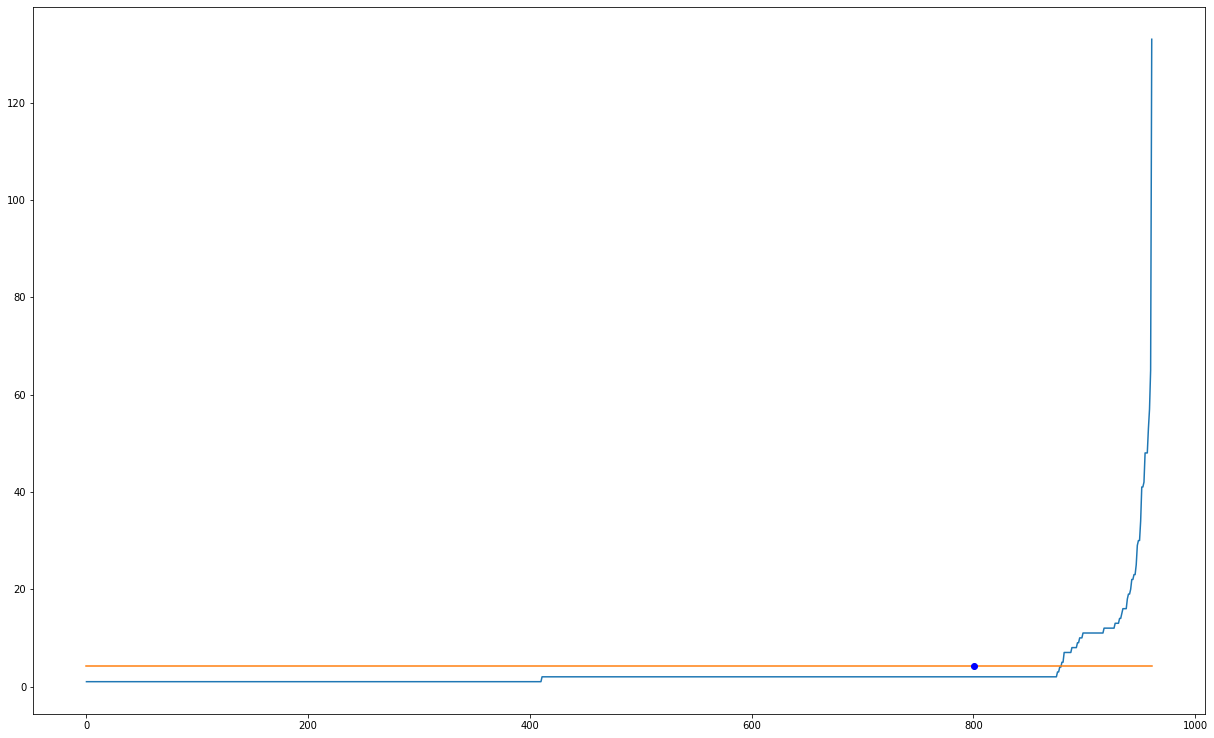

In [27]:
# how the bot determines threshold between entries and exits
amounts = sorted(mtdf.amount.values)
cutoff = 0.83333
threshold = calc_small_big_threshold_amount(vwap.my_trades[s], cutoff=cutoff)
plt.plot(amounts)
plt.plot(np.repeat(threshold, len(amounts)))
plt.plot([int(cutoff * len(amounts))], [threshold], 'bo')
print(threshold)

In [28]:
big_trades = mtdf[mtdf.amount >= threshold]
small_trades = mtdf[mtdf.amount < threshold]
long_buys = small_trades[small_trades.side == 'buy']
shrt_sels = small_trades[small_trades.side == 'sell']
long_sels = big_trades[big_trades.side == 'sell']
shrt_buys = big_trades[big_trades.side == 'buy']

lbc = long_buys.cost.sum()
lba = long_buys.amount.sum()
lsc = long_sels.cost.sum()
lsa = long_sels.amount.sum()

ssc = shrt_sels.cost.sum()
ssa = shrt_sels.amount.sum()
sbc = shrt_buys.cost.sum()
sba = shrt_buys.amount.sum()

print('total quot vol', mtdf.cost.sum())
print('n_days', round((mtdf.index[-1] - mtdf.index[0]) / 1000 / 60 / 60 / 24, 2))
print()

if lba:
    print('long_buy_cost', round(lbc, 8), 'long_buy_vwap', round(lbc / lba, 10))
if lsa:
    print('long_sel_cost', round(lsc, 8), 'long_sel_vwap', round(lsc / lsa, 10))
if lba and lsa:
    print('long_sel_vwap / long_buy_vwap', round((lsc / lsa) / (lbc / lba), 10))

print()

if ssa:
    print('shrt_sel_cost', round(ssc, 8), 'shrt_sel_vwap', round(ssc / ssa, 10))
if sba:
    print('shrt_buy_cost', round(sbc, 8), 'shrt_buy_vwap', round(sbc / sba, 10))
if ssa and sba:
    print('shrt_sel_vwap / shrt_buy_vwap', round((ssc / ssa) / (sbc / sba), 10))

all_buys = mtdf[mtdf.side == 'buy']
all_sels = mtdf[mtdf.side == 'sell']
abc = all_buys.cost.sum()
aba = all_buys.amount.sum()
asc = all_sels.cost.sum()
asa = all_sels.amount.sum()

print()
print('buy_cost', round(abc, 8), 'buy_vwap', round(abc / aba, 10))
print('sel_cost', round(asc, 8), 'sel_vwap', round(asc / asa, 10))
print('sel_vwap / buy_vwap', round((asc / asa) / (abc / aba), 10))

    


total quot vol 1.2507986999999998
n_days 10.84

long_buy_cost 0.42795157 long_buy_vwap 0.0004362401
long_sel_cost 0.46316224 long_sel_vwap 0.0004357124
long_sel_vwap / long_buy_vwap 0.9987901817

shrt_sel_cost 0.16136936 shrt_sel_vwap 0.0004314689
shrt_buy_cost 0.19831553 shrt_buy_vwap 0.0004292544
shrt_sel_vwap / shrt_buy_vwap 1.005158906

buy_cost 0.6262671 buy_vwap 0.0004340035
sel_cost 0.6245316 sel_vwap 0.0004346079
sel_vwap / buy_vwap 1.0013926128


1.007695296685167
1.1120693820360439


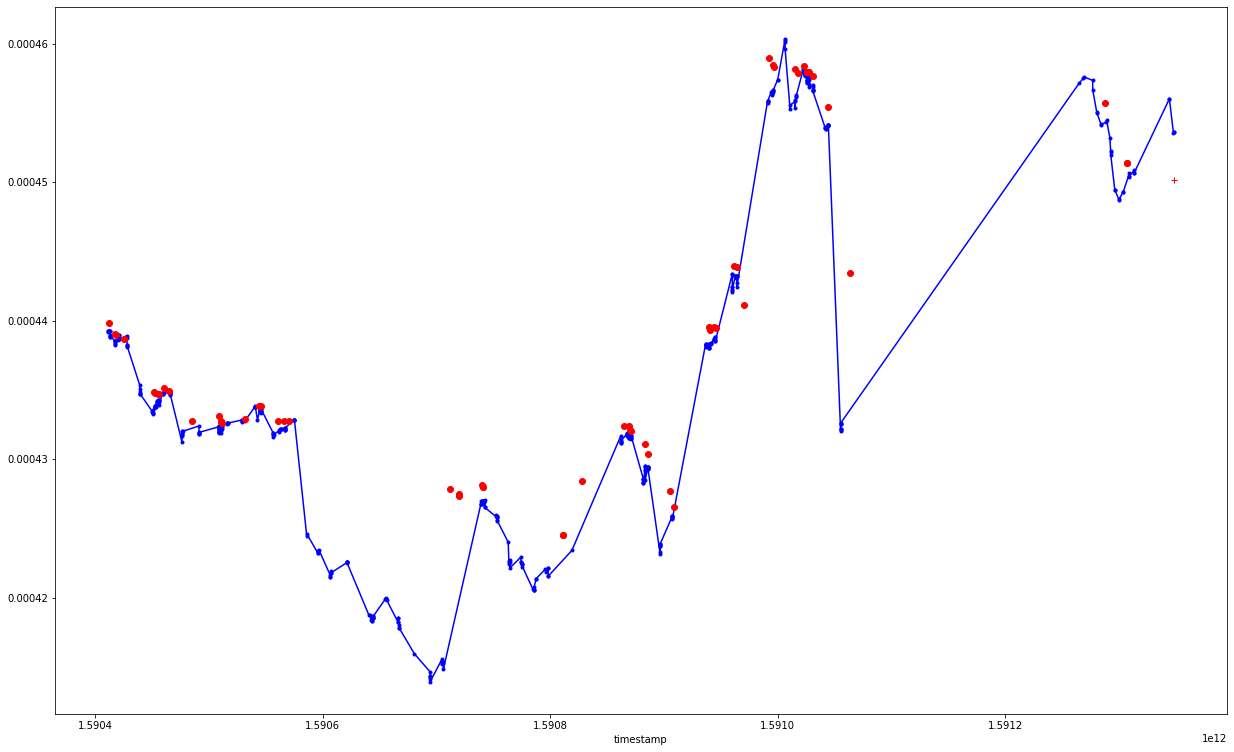

In [29]:
# blue dots are long buys, red dots are long sells, red cross is current long sell price
long_buys.price.plot(style='b.-')
long_sels.price.plot(style='ro')
long_sel_price = vwap.my_trades_analyses[s]['true_long_vwap'] * vwap.hyperparams['profit_pct_plus']
if long_sel_price > 0.0:
    plt.plot([long_buys.index[-1]], [long_sel_price], 'r+')
    print(long_buys.iloc[-1].price / long_sel_price)    
    print(long_buys.price.max() / long_buys.price.min())        

1.0184389002849894


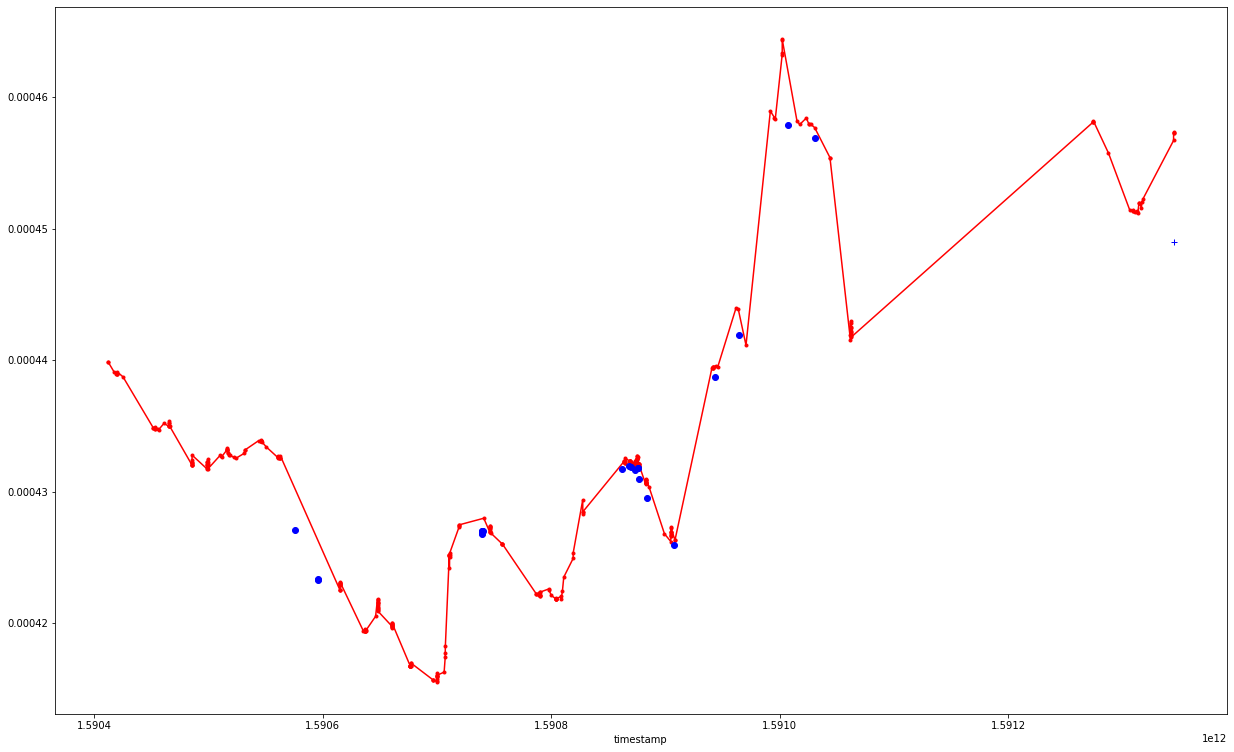

In [33]:
# red dots are short sells, blue dots are short buys, blue cross is current short buy price
shrt_sels.price.plot(style='r.-')
shrt_buys.price.plot(style='bo')
shrt_buy_price = vwap.my_trades_analyses[s]['true_shrt_vwap'] * vwap.hyperparams['profit_pct_minus']
if shrt_buy_price > 0.0:
    plt.plot([shrt_sels.index[-1]], [shrt_buy_price], 'b+')
    print(shrt_sels.iloc[-1].price / shrt_buy_price)

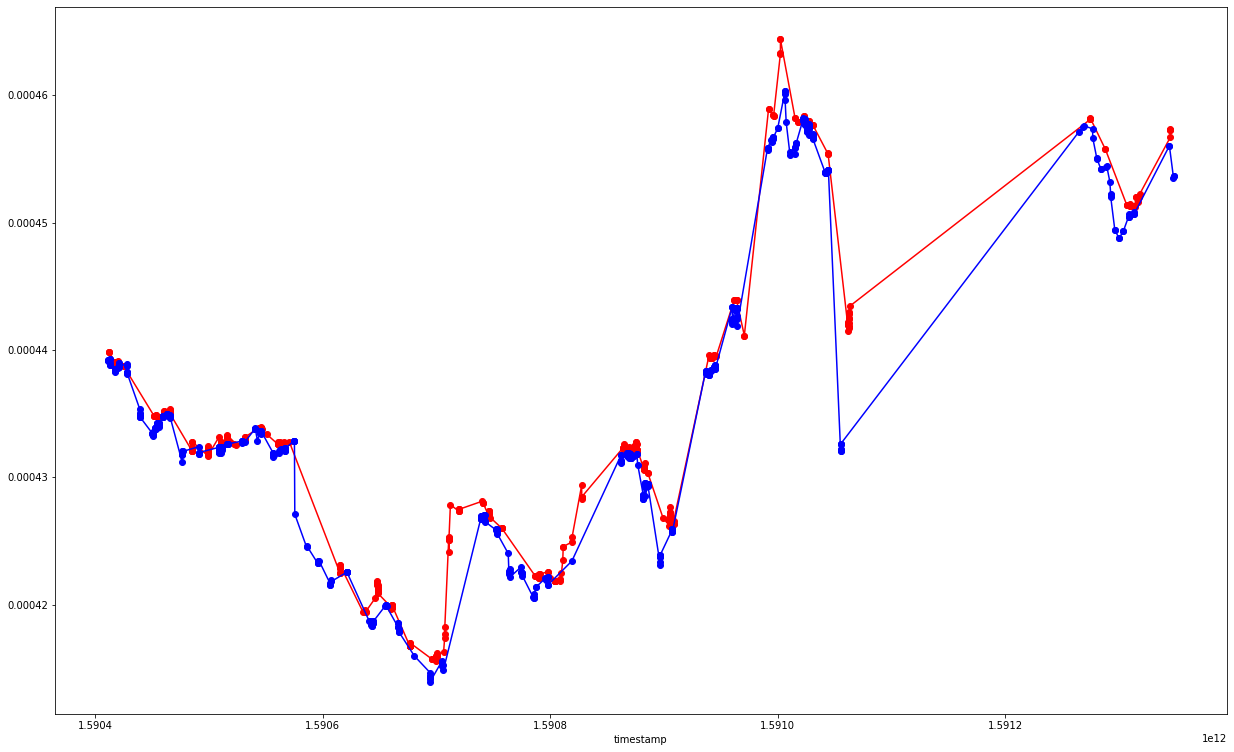

In [34]:
# all buys and sells in one
all_sels.price.plot(style='ro-')
all_buys.price.plot(style='bo-')

In [35]:
tlc = {} # true long costs
tsc = {} # true shrt costs
long_vwaps = {}
shrt_vwaps = {}
for s_ in vwap.my_trades_analyses:
    tlc[s_] = vwap.my_trades_analyses[s_]['true_long_cost']
    tsc[s_] = vwap.my_trades_analyses[s_]['true_shrt_cost']
    long_vwaps[s_] = vwap.my_trades_analyses[s_]['true_long_vwap']
    shrt_vwaps[s_] = vwap.my_trades_analyses[s_]['true_shrt_vwap']
    
for itm in sorted([(e[0], round(e[1], 4)) for e in tlc.items()], key=lambda x: x[1])[-20:]:
    print('true long cost', itm)
print()
for itm in sorted([(e[0], round(e[1], 4)) for e in tsc.items()], key=lambda x: x[1])[-20:]:
    print('true shrt cost', itm)


true long cost ('TRX/BTC', 0.0032)
true long cost ('VET/BTC', 0.0033)
true long cost ('XMR/BTC', 0.0046)
true long cost ('XTZ/BTC', 0.005)
true long cost ('BCH/BTC', 0.0061)
true long cost ('IOST/BTC', 0.0072)
true long cost ('XRP/BTC', 0.0076)
true long cost ('ETC/BTC', 0.0084)
true long cost ('ATOM/BTC', 0.0095)
true long cost ('EOS/BTC', 0.014)
true long cost ('BAT/BTC', 0.0157)
true long cost ('LINK/BTC', 0.0175)
true long cost ('ONT/BTC', 0.0288)
true long cost ('ADA/BTC', 0.0398)
true long cost ('XLM/BTC', 0.0429)
true long cost ('IOTA/BTC', 0.0548)
true long cost ('BNB/BTC', 0.0658)
true long cost ('ETH/BTC', 0.0761)
true long cost ('NEO/BTC', 0.1024)
true long cost ('QTUM/BTC', 0.1201)

true shrt cost ('ZEC/BTC', 0.0027)
true shrt cost ('ONT/BTC', 0.0028)
true shrt cost ('DASH/BTC', 0.0033)
true shrt cost ('TRX/BTC', 0.0034)
true shrt cost ('XTZ/BTC', 0.0035)
true shrt cost ('XMR/BTC', 0.0049)
true shrt cost ('BCH/BTC', 0.0064)
true shrt cost ('XRP/BTC', 0.0079)
true shrt cost 

In [36]:
lst = [(e[0], round(e[1], 8), vwap.cm.last_price[e[0]], vwap.cm.last_price[e[0]] / (e[1] if e[1] else 10e-10)) for e in shrt_vwaps.items()]
print('shrts closest to filling:')
for e in sorted(lst, key=lambda x: x[3]):
    if e[0] not in vwap.do_shrt_buy:
        continue
    
    line = f"{e[0]:<12} true shrt cost: {vwap.my_trades_analyses[e[0]]['true_shrt_cost']:.6f}"
    line += f" true shrt vwap: {e[1]:.8f} last price: {e[2]:.8f}"
    line += f" div {e[3]:.4f}"
    print(line)

    
    

shrts closest to filling:
RVN/BTC      true shrt cost: 0.000913 true shrt vwap: 0.00000208 last price: 0.00000206 div 0.9904
MATIC/BTC    true shrt cost: 0.001373 true shrt vwap: 0.00000220 last price: 0.00000219 div 0.9955
XRP/BTC      true shrt cost: 0.007910 true shrt vwap: 0.00002087 last price: 0.00002089 div 1.0009
ONT/BTC      true shrt cost: 0.002842 true shrt vwap: 0.00006064 last price: 0.00006070 div 1.0010
XTZ/BTC      true shrt cost: 0.003532 true shrt vwap: 0.00030528 last price: 0.00030620 div 1.0030
LTC/BTC      true shrt cost: 0.000243 true shrt vwap: 0.00485200 last price: 0.00486700 div 1.0031
EOS/BTC      true shrt cost: 0.014201 true shrt vwap: 0.00027845 last price: 0.00028000 div 1.0056
LINK/BTC     true shrt cost: 0.016204 true shrt vwap: 0.00045012 last price: 0.00045323 div 1.0069
XMR/BTC      true shrt cost: 0.004890 true shrt vwap: 0.00696554 last price: 0.00701700 div 1.0074
DASH/BTC     true shrt cost: 0.003258 true shrt vwap: 0.00802543 last price: 0.0081

In [37]:
lst = [(e[0], round(e[1], 8), vwap.cm.last_price[e[0]], e[1] / vwap.cm.last_price[e[0]]) for e in long_vwaps.items()]
print('longs closest to filling:')
for e in sorted(lst, key=lambda x: x[3]):
    if e[0] not in vwap.do_long_sel:
        continue
    
    line = f"{e[0]:<12} true long cost: {vwap.my_trades_analyses[e[0]]['true_long_cost']:.6f}"
    line += f" true long vwap: {e[1]:.8f} last price: {e[2]:.8f}"
    line += f" div {e[3]:.4f}"
    print(line)

    
    

longs closest to filling:
LTC/BTC      true long cost: 0.000000 true long vwap: 0.00000000 last price: 0.00486700 div 0.0000
ADA/BTC      true long cost: 0.039756 true long vwap: 0.00000729 last price: 0.00000896 div 0.8131
IOTA/BTC     true long cost: 0.054818 true long vwap: 0.00002283 last price: 0.00002570 div 0.8884
NEO/BTC      true long cost: 0.102393 true long vwap: 0.00111807 last price: 0.00124100 div 0.9009
XLM/BTC      true long cost: 0.042902 true long vwap: 0.00000772 last price: 0.00000839 div 0.9207
ETH/BTC      true long cost: 0.076108 true long vwap: 0.02316844 last price: 0.02507200 div 0.9241
BAT/BTC      true long cost: 0.015681 true long vwap: 0.00002323 last price: 0.00002493 div 0.9319
VET/BTC      true long cost: 0.003343 true long vwap: 0.00000067 last price: 0.00000071 div 0.9429
IOST/BTC     true long cost: 0.007185 true long vwap: 0.00000048 last price: 0.00000051 div 0.9495
ATOM/BTC     true long cost: 0.009524 true long vwap: 0.00030457 last price: 0.0003

In [38]:
all_bids = flatten([vwap.my_bids[s_] for s_ in vwap.my_bids])
sorted([(e['amount'] * e['price'], e['symbol']) for e in all_bids])

[(0.000227, 'IOST/BTC'),
 (0.00022710399999999997, 'ONT/BTC'),
 (0.000227408, 'QTUM/BTC'),
 (0.0002275, 'VET/BTC'),
 (0.00022776000000000003, 'MATIC/BTC'),
 (0.00022794000000000002, 'TRX/BTC'),
 (0.00022869000000000003, 'ZEC/BTC'),
 (0.00022946000000000002, 'XRP/BTC'),
 (0.0002295, 'IOTA/BTC'),
 (0.00023382700000000004, 'DASH/BTC'),
 (0.00023501400000000002, 'BNB/BTC'),
 (0.00024260000000000004, 'LTC/BTC'),
 (0.0002488, 'BAT/BTC'),
 (0.00024909, 'ETH/BTC'),
 (0.00271852, 'ZEC/BTC'),
 (0.002830344, 'ONT/BTC'),
 (0.003258035, 'DASH/BTC'),
 (0.00343539, 'TRX/BTC'),
 (0.0035230649999999997, 'XTZ/BTC'),
 (0.004884444, 'XMR/BTC'),
 (0.006398656, 'BCH/BTC'),
 (0.00788699, 'XRP/BTC'),
 (0.009686924999999999, 'ATOM/BTC'),
 (0.01096228, 'IOST/BTC'),
 (0.014165476999999998, 'EOS/BTC'),
 (0.01591668, 'BAT/BTC'),
 (0.01616364, 'LINK/BTC'),
 (0.051399959999999995, 'XLM/BTC'),
 (0.09395880000000001, 'ETH/BTC'),
 (0.10984252500000001, 'QTUM/BTC'),
 (0.11133564, 'NEO/BTC')]

In [ ]:
# overall performance analysis

In [46]:
r = []
for s_ in sorted(vwap.my_trades):
    mtdf = pd.DataFrame(vwap.my_trades[s_]).set_index('timestamp')
    n_days = (mtdf.index[-1] - mtdf.index[0]) / 1000 / 60 / 60 / 24
    buys = mtdf[mtdf.side == 'buy']
    sels = mtdf[mtdf.side == 'sell']
    bcost = buys.cost.sum()
    bamount = buys.amount.sum()
    bvwap = bcost / bamount
    scost = sels.cost.sum()
    samount = sels.amount.sum()
    svwap = scost / samount
    div_ = svwap / bvwap
    r.append({'bcost': bcost, 'scost': scost, 'g': div_, 'n_days': n_days, 'symbol': s_, 'cost': scost + bcost})

In [44]:
rdf = pd.DataFrame(r)
rdf.sort_values('g')

,bcost,scost,g,n_days,symbol,cost
19,0.045808640,0.054648150,0.9942259733,13.0804664005,VET/BTC,0.100456790
10,0.413235520,0.445556240,0.9982279333,13.7926405208,IOTA/BTC,0.858791760
15,0.291752738,0.266859471,0.9984742211,8.4132281481,ONT/BTC,0.558612209
21,0.396520181,0.377803828,1.0008369710,7.7190915046,XMR/BTC,0.774324009
3,0.462109848,0.504191683,1.0009191607,7.5452162037,BCH/BTC,0.966301531
4,0.868676084,0.806592239,1.0012689501,13.6501472454,BNB/BTC,1.675268323
11,0.626267100,0.624531600,1.0013926128,10.8368193056,LINK/BTC,1.250798700
23,0.379993404,0.418209396,1.0014025852,8.9571811111,XTZ/BTC,0.798202800
1,0.387150986,0.392283284,1.0014096806,9.4761423380,ATOM/BTC,0.779434270
6,0.343070147,0.383467581,1.0015396642,7.8049994097,EOS/BTC,0.726537728


In [45]:
(rdf.g * rdf.cost / rdf.cost.sum()).sum()

1.002512194094039

In [91]:
with open(f'logs/binance/{user}/balance_margin.txt') as f:
    lines = f.readlines()

In [92]:
bals = sorted([json.loads(line) for line in lines], key=lambda x: x['timestamp'])[2:]
ndays = (bals[-1]['timestamp'] - bals[0]['timestamp']) / 1000 / 60 / 60 / 24
print('ndays', ndays)

ndays 8.50156648148148


In [93]:
len(bals)

250

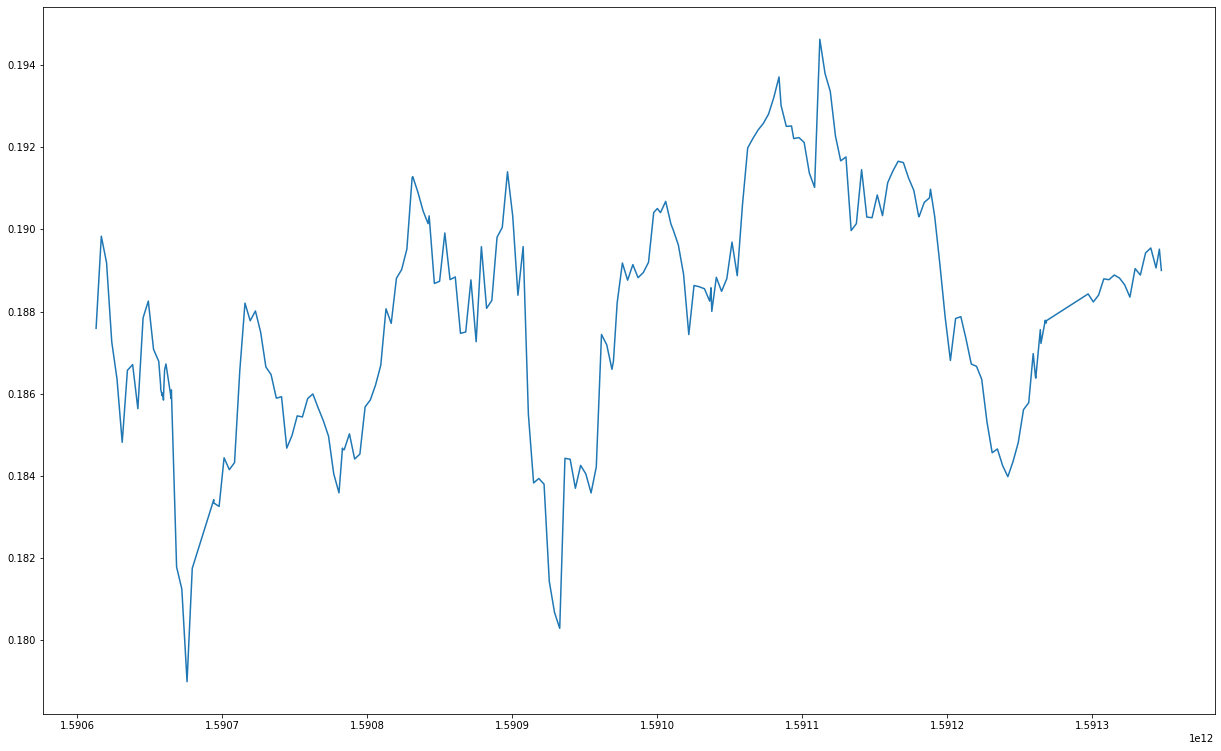

In [94]:
plt.plot([b['timestamp'] for b in bals], [b['BTC']['account_equity'] for b in bals])

In [95]:
(bals[-1]['BTC']['account_equity'] / bals[0]['BTC']['account_equity'])**(1 / ndays)

1.0008797381834804

In [91]:
'''
p * adg**ndays = r
adg**ndays = r / p
adg = (r / p)**(1 / ndays)
'''

'\np * adg**ndays = r\nadg**ndays = r / p\nadg = (r / p)**(1 / ndays)\n'

In [ ]:
# here follows a simple backtester

In [47]:
import trade_data

In [48]:
s_ = 'ATOM/BTC'
n_days = 360
ohlcv = trade_data.fetch_ohlcvs(s_, n_days)

fetched 1m ohlcvs for ATOM/BTC 2020-06-04T18:39:00
fetched 1m ohlcvs for ATOM/BTC 2020-06-04T02:00:00
fetched 1m ohlcvs for ATOM/BTC 2020-04-24T13:50:00
fetched 1m ohlcvs for ATOM/BTC 2020-03-03T19:50:00
fetched 1m ohlcvs for ATOM/BTC 2020-02-19T01:50:00
fetched 1m ohlcvs for ATOM/BTC 2020-02-08T11:20:00
fetched 1m ohlcvs for ATOM/BTC 2019-11-24T12:20:00
fetched 1m ohlcvs for ATOM/BTC 2019-11-12T13:53:00
fetched 1m ohlcvs for ATOM/BTC 2019-08-14T19:20:00
fetched 1m ohlcvs for ATOM/BTC 2019-06-09T12:17:00
2020-06-05T11:18:39  2019-06.csv already present, merging... 
2020-06-05T11:18:40  2019-08.csv already present, merging... 
2020-06-05T11:18:42  2019-11.csv already present, merging... 
2020-06-05T11:18:42  2020-02.csv already present, merging... 
2020-06-05T11:18:43  2020-03.csv already present, merging... 
2020-06-05T11:18:44  2020-04.csv already present, merging... 
2020-06-05T11:18:45  2020-06.csv already present, merging... 


In [49]:
emas = []
for span in vwap.hyperparams['ema_spans_minutes']:
    ema = ohlcv.close.ewm(span=span, adjust=False).mean()
    ema.name = str(span)
    emas.append(ema)


In [50]:
minema = pd.concat(emas, axis=1).min(axis=1)
minema.name = 'min_ema'
maxema = pd.concat(emas, axis=1).max(axis=1)
maxema.name = 'max_ema'

In [51]:
df = ohlcv.join(minema).join(maxema)

In [102]:
long_cost = 0.0
long_amount = 0.0
shrt_cost = 0.0
shrt_amount = 0.0

profit = 1.0025
default_trade_cost = 0.0001
min_big_trade_size = default_trade_cost * 6

long_sel_price = 9e9
shrt_buy_price = 0.0

long_sels = []
shrt_buys = []

long_buys = []
shrt_sels = []

long_sel_prices = []
shrt_buy_prices = []

biggest_long_cost = 0.0
biggest_shrt_cost = 0.0


for row in df.itertuples():
    if long_amount > min_big_trade_size and row.high >= long_sel_price:
        biggest_long_cost = max(biggest_long_cost, long_cost)
        long_sels.append({'price': long_sel_price, 'amount': long_amount, 'timestamp': row.Index})
        long_cost = 0.0
        long_amount = 0.0
        long_sel_price = 9e9
    elif row.low <= row.min_ema:
        long_buy_price = row.min_ema
        long_buy_amount = default_trade_cost / long_buy_price
        long_buys.append({'price': long_buy_price, 'amount': long_buy_amount, 'timestamp': row.Index})
        long_cost += default_trade_cost
        long_amount += long_buy_amount
        long_sel_price = (long_cost / long_amount) * profit
        long_sel_prices.append({'timestamp': row.Index, 'long_sel_price': long_sel_price})
    
    if shrt_amount > min_big_trade_size and row.low <= shrt_buy_price:
        biggest_shrt_cost = max(biggest_shrt_cost, shrt_cost)
        
        shrt_buys.append({'price': shrt_buy_price, 'amount': shrt_amount, 'timestamp': row.Index})
        shrt_cost = 0.0
        shrt_amount = 0.0
        shrt_buy_price = 0.0
    elif row.high >= row.max_ema:
        shrt_sel_price = ((row.low + row.close) / 2)
        shrt_sel_amount = default_trade_cost / shrt_sel_price
        shrt_sels.append({'price': shrt_sel_price, 'amount': shrt_sel_amount, 'timestamp': row.Index})
        shrt_cost += default_trade_cost
        shrt_amount += shrt_sel_amount
        shrt_buy_price = (shrt_cost / shrt_amount) / profit
        shrt_buy_prices.append({'timestamp': row.Index, 'shrt_buy_price': shrt_buy_price})
biggest_long_cost, biggest_shrt_cost


(5.619200000000243, 0.51169999999996)

In [103]:
print('10 longest bag durations:\n')
for e in sorted(np.diff([e['timestamp'] / 1000 / 60 / 60 / 24 for e in long_sels]))[-10:]:
    print('long', e)
print()
for e in sorted(np.diff([e['timestamp'] / 1000 / 60 / 60 / 24 for e in shrt_buys]))[-10:]:
    print('shrt', e)

10 longest bag durations:

long 3.0451388888905058
long 3.06319444444307
long 3.5284722222240816
long 3.5583333333343035
long 3.875
long 4.413888888888323
long 7.163888888888323
long 15.257638888888323
long 23.77916666666715
long 87.69305555555547

shrt 0.8777777777795563
shrt 0.9513888888868678
shrt 0.9520833333372138
shrt 1.0340277777759184
shrt 1.2590277777781012
shrt 1.34444444444307
shrt 1.4048611111102218
shrt 1.6291666666693345
shrt 1.8638888888890506
shrt 8.34236111111386


In [104]:
lspdf = pd.DataFrame(long_sel_prices).set_index('timestamp')
sbpdf = pd.DataFrame(shrt_buy_prices).set_index('timestamp')


lbdf = pd.DataFrame(long_buys).set_index('timestamp')
ssdf = pd.DataFrame(shrt_sels).set_index('timestamp')

lsdf = pd.DataFrame(long_sels).set_index('timestamp')
sbdf = pd.DataFrame(shrt_buys).set_index('timestamp')

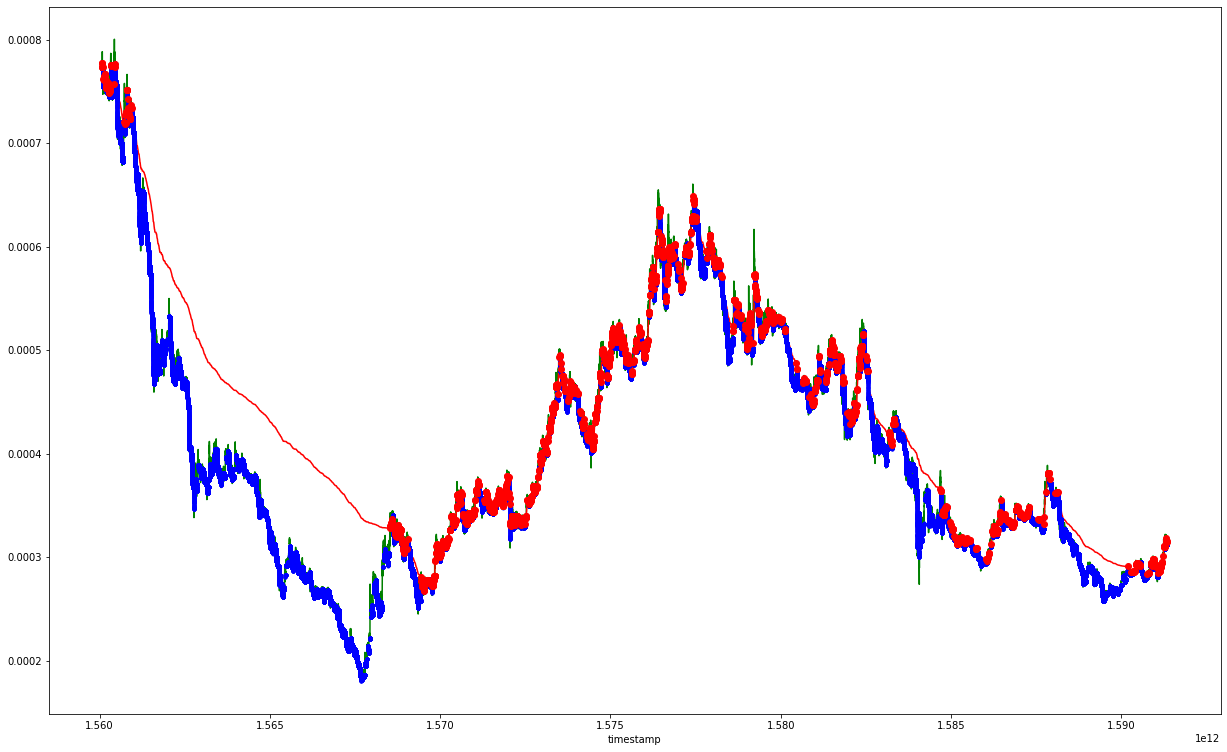

In [105]:
# long
plt.plot(df.close, 'g')
plt.plot(lspdf, 'r-')
lbdf.price.plot(style='b.')
lsdf.price.plot(style='ro')

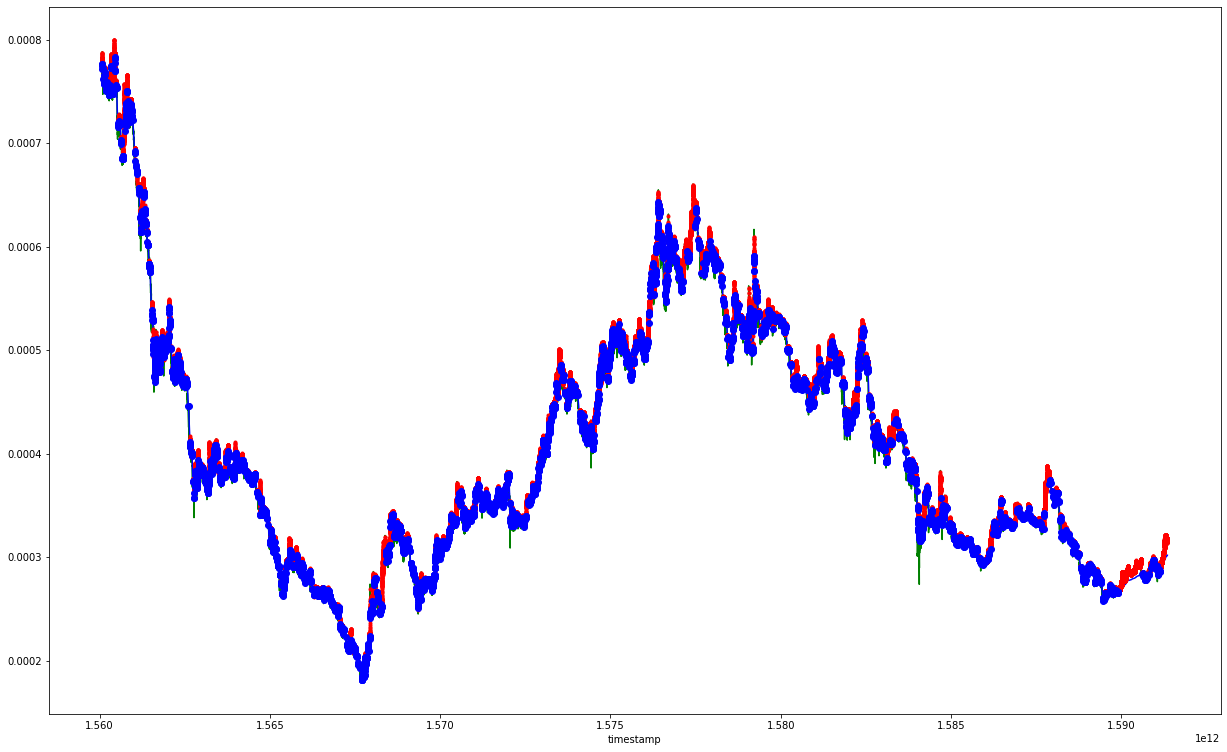

In [106]:
# short
plt.plot(df.close, 'g')
plt.plot(sbpdf, 'b-')
ssdf.price.plot(style='r.')
sbdf.price.plot(style='bo')

In [107]:
lbcost = (lbdf.price * lbdf.amount).sum()
lbamount = lbdf.amount.sum()

In [108]:
lbvwap = lbcost / lbamount

In [109]:
lscost = (lsdf.price * lsdf.amount).sum()
lsamount = lsdf.amount.sum()

In [110]:
lsvwap = lscost / lsamount

In [111]:
(lsvwap / lbvwap - 1) * lbcost

0.052631499999933426

In [112]:
abdf = pd.concat([lbdf, sbdf]).sort_index()
asdf = pd.concat([ssdf, lsdf]).sort_index()
bcost = (abdf.amount * abdf.price).sum()
bamount = abdf.amount.sum()
bvwap = bcost / bamount
scost = (asdf.amount * asdf.price).sum()
samount = asdf.amount.sum()
svwap = scost / samount
(bcost, bvwap), (scost, svwap), (svwap / bvwap,)

((39.14766234413963, 0.0003716796714848244),
 (39.437331499999935, 0.0003721898110330126),
 (1.0013725247500092,))